In [1]:
import pandas as pd
import os

In [2]:
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 10000)  # Set display width to avoid line breaks

In [3]:
df = pd.read_csv('/Users/aaliyahgritly/Downloads/Bebo study items/archive/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df_desc = pd.read_csv('/Users/aaliyahgritly/Downloads/Bebo study items/archive/DescriptionDataCoSupplyChain.csv', encoding='ISO-8859-1')
df_logs= pd.read_csv('/Users/aaliyahgritly/Downloads/Bebo study items/archive/tokenized_access_logs.csv', encoding='ISO-8859-1')

In [4]:
df.sample(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
27587,DEBIT,6,4,113.750000,227.500000,Late delivery,1,24,Women's Apparel,Hickory,EE. UU.,XXXXXXXXX,Jessica,7848,Smith,XXXXXXXXX,Corporate,NC,1585 Misty Lake Terrace,28601.0,5,Golf,35.776661,-81.362625,Europe,Budapest,Hungría,7848,11/24/2016 17:46,47525,502,22.5,0.09,118814,50.000000,0.50,5,250.000000,227.500000,113.750000,Eastern Europe,Budapest,COMPLETE,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,11/30/2016 17:46,Standard Class
79894,TRANSFER,6,2,-153.389999,199.990005,Late delivery,1,48,Water Sports,Irvington,EE. UU.,XXXXXXXXX,William,4308,Smith,XXXXXXXXX,Consumer,NJ,3141 Misty Lookout,7111.0,7,Fan Shop,40.730980,-74.223228,USCA,San Francisco,Estados Unidos,4308,4/17/2016 3:32,32345,1073,0.0,0.00,80888,199.990005,-0.77,1,199.990005,199.990005,-153.389999,West of USA,California,PENDING,94109.0,1073,48,NaN,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0,4/23/2016 3:32,Second Class
45038,PAYMENT,2,4,2.280000,48.500000,Advance shipping,0,24,Women's Apparel,Richmond,EE. UU.,XXXXXXXXX,Michael,5334,Smith,XXXXXXXXX,Corporate,KY,2423 Indian Brook Valley,40475.0,5,Golf,37.739349,-84.225693,Africa,Mahajanga,Madagascar,5334,9/14/2016 1:55,42616,502,1.5,0.03,106372,50.000000,0.05,1,50.000000,48.500000,2.280000,East Africa,Boeny,PENDING_PAYMENT,NaN,502,24,NaN,http://images.acmesports.sports/Nike+Men%27s+D...,Nike Men's Dri-FIT Victory Golf Polo,50.000000,0,9/16/2016 1:55,Standard Class
77054,DEBIT,6,4,-34.970001,146.940002,Late delivery,1,46,Indoor/Outdoor Games,Caguas,Puerto Rico,XXXXXXXXX,Arthur,1117,Maddox,XXXXXXXXX,Consumer,PR,6829 Umber Isle,725.0,7,Fan Shop,18.261364,-66.370514,Europe,Villeneuve-le-Roi,Francia,1117,10/2/2017 11:22,68880,1014,3.0,0.02,172189,49.980000,-0.24,3,149.940002,146.940002,-34.970001,Western Europe,Isla de Francia,COMPLETE,NaN,1014,46,NaN,http://images.acmesports.sports/O%27Brien+Men%...,O'Brien Men's Neoprene Life Vest,49.980000,0,10/8/2017 11:22,Standard Class
74891,DEBIT,2,4,-302.380005,188.990005,Advance shipping,0,48,Water Sports,Caguas,Puerto Rico,XXXXXXXXX,Edward,8000,Patterson,XXXXXXXXX,Home Office,PR,3289 Thunder Prairie Inlet,725.0,7,Fan Shop,18.229345,-66.370506,Pacific Asia,Bagdad,Irak,8000,8/29/2016 21:34,41576,1073,11.0,0.06,103783,199.990005,-1.60,1,199.990005,188.990005,-302.380005,West Asia,Bagdad,COMPLETE,NaN,1073,48,NaN,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0,8/31/2016 21:34,Standard Class


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
# Function to inspect a DataFrame
def inspect_table(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape) # rows, columns
    print("Columns & Types:\n", df.dtypes) # column names and data types
    print("Missing values:\n", df.isna().sum()) # missing values per column
    print("First 3 rows:\n", df.head(3)) # first 3 rows
    print("\n")

inspect_table(df, "Orders")


--- Orders ---
Shape: (180519, 53)
Columns & Types:
 Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Long

# Drop unnecessery columns

In [7]:
df_columns_to_drop = ['Product Description', 'Order Zipcode', 'Customer Fname', 'Customer Lname', 'Customer Zipcode', 'Customer Password',
                   'Customer Email', 'Customer Street', 'Product Image']

print("Columns to drop:", len(df_columns_to_drop))

Columns to drop: 9


In [8]:
df.drop(columns = df_columns_to_drop, inplace=True)

In [9]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Rename columns for clarity and convert dates to datetime

In [10]:
# Renaming columns for clarity
df.rename(columns = {'order date (DateOrders)': 'order_date', 
                     'shipping date (DateOrders)': 'shipping_date'
                     }, inplace=True)

In [11]:
# Converting date columns to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors = 'coerce')
df['shipping_date'] = pd.to_datetime(df['shipping_date'], errors = 'coerce')

print(df[['order_date', 'shipping_date']].head())

           order_date       shipping_date
0 2018-01-31 22:56:00 2018-02-03 22:56:00
1 2018-01-13 12:27:00 2018-01-18 12:27:00
2 2018-01-13 12:06:00 2018-01-17 12:06:00
3 2018-01-13 11:45:00 2018-01-16 11:45:00
4 2018-01-13 11:24:00 2018-01-15 11:24:00


In [12]:
# Checking for duplicate rows
print(f"Are there any duplicate rows? {df.duplicated().any()}")
print(f"Sum of duplicate rows: {df.duplicated().sum()}")
print(f"Total rows before removing duplicates: {df.shape[0]}")

Are there any duplicate rows? False
Sum of duplicate rows: 0
Total rows before removing duplicates: 180519


# Fill missing numeric values with median

In [13]:
numeric_cols = ['Days for shipping (real)', 'Days for shipment (scheduled)',
                'Benefit per order', 'Order Item Product Price', 
                'Order Item Quantity', 'Order Item Total']

for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median()) # Impute missing numeric values with median
    
print(f"Missing values after imputation:\n{df[numeric_cols].isna().sum()}") # should be 0 for all columns

Missing values after imputation:
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Order Item Product Price         0
Order Item Quantity              0
Order Item Total                 0
dtype: int64


# Fill missing values in cetgorical columns with `Unknown`

In [14]:
categorical_cols = ['Delivery Status', 'Late_delivery_risk', 
                    'Category Name', 'Shipping Mode']

for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")

print
print(f"Missing values after imputation:\n{df[categorical_cols].isna().sum()}") # should be 0 for all columns

Missing values after imputation:
Delivery Status       0
Late_delivery_risk    0
Category Name         0
Shipping Mode         0
dtype: int64


# Create new calculated columns

In [23]:
# Redundant columns to drop
df.drop(columns = ['Late_delivery_risk', 
                   'Benefit per order', 'Order Item Discount Rate', 'Order Item Product Price'], inplace=True)

In [27]:
df[['Profit Per Order', 'Order Item Total', 'Sales', 'Product Price', 'Order Item Quantity', 'Order Item Profit Ratio', 'Order Item Discount Percentage']].sample(10)

,Profit Per Order,Order Item Total,Sales,Product Price,Order Item Quantity,Order Item Profit Ratio,Order Item Discount Percentage
112491,35.560001,97.96,99.96,49.98,2,0.36,2.0
125803,8.240000,38.70,43.98,21.99,2,0.21,12.0
120486,-77.989998,97.49,129.99,129.99,1,-0.80,25.0
27394,-235.139999,134.37,159.96,39.99,4,-1.75,16.0
86335,60.580002,484.65,532.58,532.58,1,0.13,9.0
167337,117.589996,239.98,299.98,299.98,1,0.49,20.0
39604,-9.460000,248.98,299.98,299.98,1,-0.04,17.0
139803,-62.689999,97.96,99.96,24.99,4,-0.64,2.0
64214,58.689999,187.49,249.99,249.99,1,0.31,25.0
124760,-203.669998,116.38,119.98,59.99,2,-1.75,3.0


In [18]:
df['Late Delivery'] = df['Days for shipment (scheduled)'] - df['Days for shipping (real)'] # positive means delayed, negative means early

df[['Late Delivery', 'Days for shipment (scheduled)', 'Days for shipping (real)', 'Delivery Status', 'Delivered On Time']].sample(10)

,Late Delivery,Days for shipment (scheduled),Days for shipping (real),Delivery Status,Delivered On Time
50918,-1,1,2,Late delivery,No
115573,-4,2,6,Late delivery,No
104046,-1,1,2,Late delivery,No
135094,1,4,3,Advance shipping,Yes
80884,-1,4,5,Late delivery,No
8409,2,4,2,Advance shipping,Yes
180496,2,4,2,Advance shipping,Yes
135114,0,4,4,Shipping canceled,Cancelled
109193,-2,4,6,Late delivery,No
49034,0,2,2,Shipping on time,Yes


In [17]:
df['Delivered On Time'] = df['Delivery Status'].apply(lambda x: 'Yes' if x == 'Shipping on time' or x == 'Advance shipping' else 'No' if x == 'Late delivery' else 'Cancelled') 

In [29]:
# Round all numeric columns in df to two decimal places
df['Order Item Discount'] = df['Order Item Discount'].round(2)
df['Order Item Total'] = df['Order Item Total'].round(2)
df['Sales per customer'] = df['Sales per customer'].round(2)
df['Sales'] = df['Sales'].round(2)
df['Product Price'] = df['Product Price'].round(2)
df['Order Item Discount Percentage'] = df['Order Item Discount Percentage'].round(2)
df['Profit Per Order'] = df['Profit Per Order'].round(2)

In [19]:
df['Order Item Discount Percentage'] = df['Order Item Discount Rate'] * 100  # Convert to percentage

In [20]:
df.rename(columns = {'Order Profit Per Order': 'Profit Per Order'}, inplace=True)

In [123]:
df.drop(columns = ['Delivery Delay'], inplace=True)

In [51]:
df.head()

,type,actual_shipping_days,scheduled_shipping_days,sales_per_customer,delivery_status,category_id,category_name,customer_city,customer_id,customer_segment,customer_state,department_id,department_name,latitude,longitude,market,order_city,order_country,order_customer_id,order_date,order_id,order_item_cardprod_id,order_item_discount,order_item_id,order_item_profit_ratio,order_item_quantity,sales,order_item_total,profit_per_order,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,late_delivery,delivered_on_time,order_item_discount_percentage
0,DEBIT,3,4,314.64,Advance shipping,73,Sporting Goods,Caguas,20755,Consumer,PR,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,2018-01-31 22:56:00,77202,1360,13.11,180517,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2018-02-03 22:56:00,Standard Class,1,Yes,4.0
1,TRANSFER,5,4,311.36,Late delivery,73,Sporting Goods,Caguas,19492,Consumer,PR,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,2018-01-13 12:27:00,75939,1360,16.39,179254,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,-1,No,5.0
2,CASH,4,4,309.72,Shipping on time,73,Sporting Goods,San Jose,19491,Consumer,CA,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,2018-01-13 12:06:00,75938,1360,18.03,179253,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,0,Yes,6.0
3,DEBIT,3,4,304.81,Advance shipping,73,Sporting Goods,Los Angeles,19490,Home Office,CA,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,2018-01-13 11:45:00,75937,1360,22.94,179252,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,2018-01-16 11:45:00,Standard Class,1,Yes,7.0
4,PAYMENT,2,4,298.25,Advance shipping,73,Sporting Goods,Caguas,19489,Corporate,PR,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,2018-01-13 11:24:00,75936,1360,29.50,179251,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,2018-01-15 11:24:00,Standard Class,2,Yes,9.0


# Data checks

In [54]:
df['order_country'].value_counts()

order_country
Estados Unidos       24840
Francia              13222
México               13172
Alemania              9564
Australia             8497
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Sáhara Occidental        2
Burundi                  1
Serbia                   1
Name: count, Length: 164, dtype: int64

<Axes: title={'center': 'Customer Segment Distribution'}, ylabel='Customer Segment'>

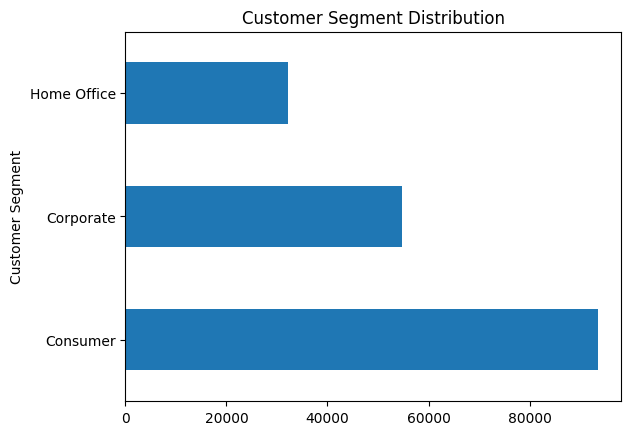

In [33]:
df['Customer Segment'].value_counts().plot(kind='barh', title='Customer Segment Distribution')

In [34]:
# Same Day shipping mode delivery performance
df[df['Shipping Mode'] == 'Same Day']['Delivered On Time'].value_counts()

Delivered On Time
Yes          4839
No           4454
Cancelled     444
Name: count, dtype: int64

In [35]:
df.drop(columns = ['Customer Country'], inplace=True)

In [36]:
df[df['Shipping Mode'] == 'Standard Class']['Delivered On Time'].value_counts()

Delivered On Time
Yes          62130
No           41023
Cancelled     4599
Name: count, dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   type                            180519 non-null  object        
 1   actual_shipping_days            180519 non-null  int64         
 2   scheduled_shipping_days         180519 non-null  int64         
 3   sales_per_customer              180519 non-null  float64       
 4   delivery_status                 180519 non-null  object        
 5   category_id                     180519 non-null  int64         
 6   category_name                   180519 non-null  object        
 7   customer_city                   180519 non-null  object        
 8   customer_id                     180519 non-null  int64         
 9   customer_segment                180519 non-null  object        
 10  customer_state                  180519 non-null  object 

# Saving the new table to csv

In [ ]:
df = df.rename(columns=lambda x: x.lower().replace(" ", "_").replace("-", "_")) # Standardize column names

In [50]:
df.to_csv('/Users/aaliyahgritly/Downloads/Bebo study items/(P2) Supply Chain/ Cleaned Data.csv', index = False)

In [41]:
df.drop(columns = ['product_status'], inplace=True)

In [48]:
df.rename(columns={'days_for_shipping_(real)': 'actual_shipping_days'}, inplace=True)
df.rename(columns={'days_for_shipment_(scheduled)': 'scheduled_shipping_days'}, inplace=True)


In [55]:
df.columns

Index(['type', 'actual_shipping_days', 'scheduled_shipping_days', 'sales_per_customer', 'delivery_status', 'category_id', 'category_name', 'customer_city', 'customer_id', 'customer_segment', 'customer_state', 'department_id', 'department_name', 'latitude', 'longitude', 'market', 'order_city', 'order_country', 'order_customer_id', 'order_date', 'order_id', 'order_item_cardprod_id', 'order_item_discount', 'order_item_id', 'order_item_profit_ratio', 'order_item_quantity', 'sales', 'order_item_total', 'profit_per_order', 'order_region', 'order_state', 'order_status', 'product_card_id', 'product_category_id', 'product_name', 'product_price', 'shipping_date', 'shipping_mode', 'late_delivery', 'delivered_on_time', 'order_item_discount_percentage'], dtype='object')